In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
## 한 페이지의 테이블 + 내용 링크를 가져오는 함수 만들기
def page_scrapping(page_no):
    url = f'https://www.g2b.go.kr:8101/ep/tbid/tbidList.do?area=&areaNm=&bidNm=&bidSearchType=1&budgetCompare=&detailPrdnm=&detailPrdnmNo=&downBudget=&fromBidDt=2023%2F01%2F01&fromOpenBidDt=&industry=&industryCd=&instNm=&instSearchRangeType=&intbidYn=&orgArea=&procmntReqNo=&radOrgan=1&recordCountPerPage=30&refNo=&regYn=Y&searchDtType=1&searchType=1&strArea=&taskClCds=&toBidDt=2023%2F01%2F15&toOpenBidDt=&upBudget=&useTotalCount=Y&currentPageNo={page_no}'
    response = requests.get(url)
    html = BeautifulSoup(response.text, 'html.parser')
    
    content_link = []
    for i in html.select('td.tl > div > a'):
        content_link.append(i['href'])

    df = pd.read_html(url)[0]
    df = df[df['업무'].notnull()]
    df["내용링크"] = content_link
    
    return df

In [3]:
page_scrapping(316) # 한 페이지만 가져옴

,업무,공고번호-차수,분류,공고명,공고기관,수요기관,계약방법,입력일시 (입찰마감일시),공동 수급,투찰,내용링크
0,용역,20230104952-00,긴급,2023년 고산자로 장기사용 배수관 정비공사 교통소통대책 수립용역,서울특별시,서울특별시 상수도사업본부 동부수도사업소,제한경쟁,2023/01/06 09:46 (2023/01/12 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
1,용역,20230104959-00,긴급,북도면 교통여건 개선방안 수립용역,인천광역시 옹진군,인천광역시 옹진군,수의(총액)소액-견적입찰(2인 이상 견적 제출),2023/01/06 09:46 (2023/01/12 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
2,물품,20230104179-00,일반,대면적 나노 입자 입도 분석 시스템,조달청 인천지방조달청,와이엠티(주),제한(총액)규격가격동시,2023/01/06 09:45 (2023/01/18 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
3,공사,20230102951-01,변경,강릉해람중학교 특별교실(과학실외 3실) 환경개선공사,강원도교육청 강원도강릉교육지원청 강릉해람중학교,강원도교육청 강원도강릉교육지원청 강릉해람중학교,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/06 09:45 (2023/01/12 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
4,물품,20230104368-00,일반,인천지방법원 부천지원 전산소모품(토너및드럼) 구매입찰 공고,대법원 인천지방법원 부천지원,대법원 인천지방법원 부천지원,제한(총액),2023/01/06 09:45 (2023/01/12 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
5,물품,A102300097-00,일반,[497584]항공슬링 외 12종,한전케이피에스주식회사,발전안전사업본부 영흥사업처,수의(총액),2023/01/06 09:45 (2023/01/13 18:00),NaN,한전케이피에스주식회사 이동,https://www.g2b.go.kr:8101/ep/tbid/selectProdB...
6,물품,20230104956-00,일반,의약품 공급(단가)계약(재공고),국민건강보험공단 일산병원,국민건강보험공단 일산병원,일반(총액),2023/01/06 09:44 (2023/01/12 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
7,용역,20230104957-00,일반,성남아트센터 홈페이지 성남문화재단 대관시스템 유지보수,재단법인 성남문화재단,재단법인 성남문화재단,제한(총액)협상에의한계약,2023/01/06 09:44 (-),NaN,NaN,https://www.g2b.go.kr:8081/ep/invitation/publi...
8,용역,20230104280-00,일반,오태초등학교 외 1교(형일초) 진입로포장 및 기타공사 설계용역 수의견적 제출 안내,경상북도교육청 경상북도구미교육지원청,경상북도교육청 경상북도구미교육지원청,수의(총액)소액-견적입찰(2인 이상 견적 제출),2023/01/06 09:44 (2023/01/12 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
9,공사,20230103876-00,일반,원전해체핵심기술연구센터 메이커스페이스 인테리어 공사,조달청 부산지방조달청,부산대학교 산학협력단,지역제한,2023/01/06 09:44 (2023/01/20 10:00),마감,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...


## 마지막 페이지 번호 찾기

In [4]:
url = f'https://www.g2b.go.kr:8101/ep/tbid/tbidList.do?area=&areaNm=&bidNm=&bidSearchType=1&budgetCompare=&detailPrdnm=&detailPrdnmNo=&downBudget=&fromBidDt=2023%2F01%2F01&fromOpenBidDt=&industry=&industryCd=&instNm=&instSearchRangeType=&intbidYn=&orgArea=&procmntReqNo=&radOrgan=1&recordCountPerPage=30&refNo=&regYn=Y&searchDtType=1&searchType=1&strArea=&taskClCds=&toBidDt=2023%2F01%2F15&toOpenBidDt=&upBudget=&useTotalCount=Y&currentPageNo=1'
response = requests.get(url)
html = BeautifulSoup(response.text, 'html.parser')
last_page = html.select('#pagination > a.next_end')[0]['href'].split('=')[-1]
last_page

'488'

## 전체 페이지 내용 링크 찾기

In [5]:
from tqdm import trange
import time

page_list = []
for i in trange(1, int(last_page)+1):
    result = page_scrapping(page_no=i)
    page_list.append(result)
    time.sleep(0.01)

100%|████████████████████████████████████████████████████████████████████████████████| 488/488 [08:25<00:00,  1.04s/it]


## 수집한 내용 링크 하나로 붙이기

In [6]:
df = pd.concat(page_list, ignore_index=True)
df.shape

(14614, 11)

In [7]:
df

,업무,공고번호-차수,분류,공고명,공고기관,수요기관,계약방법,입력일시 (입찰마감일시),공동 수급,투찰,내용링크
0,용역,20230114134-00,일반,2023년 선박해양플랜트연구소 출퇴근버스 임차용역,한국해양과학기술원 부설 선박해양플랜트연구소,한국해양과학기술원 부설 선박해양플랜트연구소,수의(총액)소액-견적입찰(2인 이상 견적 제출),2023/01/15 19:33 (2023/01/20 11:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
1,공사,20230114039-01,변경,한내초등학교 급식실 환기설비 개선 기계설비공사,충청남도교육청 충청남도보령교육지원청 한내초등학교,충청남도교육청 충청남도보령교육지원청 한내초등학교,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 18:57 (2023/01/19 15:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
2,용역,20230114117-00,일반,두산베어스 데이 이벤트 상품 제작 사업,(주)두산베어스,(주)두산베어스,일반(총액)협상에의한계약,2023/01/15 18:23 (-),NaN,NaN,https://www.g2b.go.kr:8081/ep/invitation/publi...
3,공사,20230114104-02,변경,2023년 속초시 상수도시설 긴급 보수공사 단가계약(1권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 17:59 (2023/01/19 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
4,공사,20230114113-00,일반,2023년 속초시 상수도시설 긴급 보수공사 단가계약(5권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 17:56 (2023/01/19 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
...,...,...,...,...,...,...,...,...,...,...,...
14609,용역,20230100009-00,일반,경산여자고등학교 2023학년도 2학년 현장체험학습(수학여행)위탁용역 입찰 공고[긴급],경상북도교육청 경산여자고등학교,경상북도교육청 경산여자고등학교,제한(총액)규격가격동시,2023/01/01 10:55 (2023/01/12 16:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
14610,용역,20230100007-00,일반,2023학년도 서울언주초등학교 오케스트라 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:52 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
14611,용역,20230100006-00,일반,2023학년도 서울언주초등학교 승마교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:44 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...
14612,용역,20230100005-00,일반,2023학년도 서울언주초등학교 수학교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:36 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...


In [8]:
df.shape

(14614, 11)

## 내용 페이지에 HTTP 요청

In [9]:
response = requests.get(df.iloc[1]['내용링크'])
response

<Response [200]>

In [10]:
df.iloc[1]['내용링크']

'https://www.g2b.go.kr:8081/ep/invitation/publish/bidInfoDtl.do?bidno=20230114039&bidseq=01&releaseYn=Y&taskClCd=3 '

In [11]:
content_html = BeautifulSoup(response.text)
content_html

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>입찰공고 상세</title>
<link href="/gov/koneps/co/css/body.css" rel="stylesheet" type="text/css"/>
<link href="/gov/koneps/co/css/width.css" rel="stylesheet" type="text/css"/>
<!--[if IE]>
<link rel="stylesheet" type="text/css" href="/gov/koneps/co/css/ie.css" />
<![endif]-->
<!--[if IE 8]>
<link rel="stylesheet" type="text/css" href="/gov/koneps/co/css/ie8.css" />
<![endif]-->
<!--[if IE 7]>
<link rel="stylesheet" type="text/css" href="/gov/koneps/co/css/ie7.css" />
<![endif]-->
<!--[if IE 6]>
<link rel="stylesheet" type="text/css" href="/gov/koneps/co/css/ie6.css" />
<script src="/gov/koneps/co/js/png_ie6.js" type="text/livescript"></script>
<script language="javascript" type="text/javascript">
//<![CDATA[
DD_belatedPNG.fi

In [12]:
content = pd.read_html(response.text)
content

[                0
 0  첨부물 오류 정정(자세히),
             0                                                 1
 0   입찰집행 부가정보            PQ심사결과조회  지명경쟁자료조회  실적경쟁자료조회  현장설명참가조회
 1  신청서/입찰서 제출  PQ심사신청  실적심사신청 적격심사신청  현장설명참가신청  공동수급협정서관리  지문투찰,
                       0                                                  1  \
 0                  공고종류                                                실공고   
 1                입찰공고번호                                   20230114039 - 01   
 2                   공고명  한내초등학교 급식실 환기설비 개선 기계설비공사 (정정공고)  본 공고는 지문인식 전...   
 3                  공고기관                         충청남도교육청 충청남도보령교육지원청 한내초등학교   
 4                  입찰방식                                               전자입찰   
 5                  계약방법                           수의(소액)-견적입찰(2인 이상 견적 제출)   
 6                   재입찰          재입찰 허용  (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)   
 7                발주계획번호                            3-1-2023-8171049-000001   
 8            국내/국제 입찰사유                              

In [13]:
content_list = []
[content_list.append(i) for i in content]
total = pd.concat(content_list, axis = 1, ignore_index = True)
total

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,첨부물 오류 정정(자세히),입찰집행 부가정보,PQ심사결과조회 지명경쟁자료조회 실적경쟁자료조회 현장설명참가조회,공고종류,실공고,게시일시,2023/01/15 18:57,공고담당자,최아현 (041-934-2101),집행관,...,공고서에 의함,공고서에 의함,1.0,공고서,20230114039-01_1673776417457_급식실 환기설비공사 소액수의 공...,20230114039-01,0.0,한내초등학교 급식실 환기설비 개선 기계설비공사,2023/01/19 16:00,개찰완료
1,NaN,신청서/입찰서 제출,PQ심사신청 실적심사신청 적격심사신청 현장설명참가신청 공동수급협정서관리 지문투찰,입찰공고번호,20230114039 - 01,참조번호,한내초2023-01,입찰개시일시,2023/01/16 09:00:00,입찰마감일시,...,NaN,NaN,2.0,내역서,20230114039-01_1673776470017_2. 한내초등학교 조리실 환기설...,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,공고명,한내초등학교 급식실 환기설비 개선 기계설비공사 (정정공고) 본 공고는 지문인식 전...,한내초등학교 급식실 환기설비 개선 기계설비공사 (정정공고) 본 공고는 지문인식 전...,한내초등학교 급식실 환기설비 개선 기계설비공사 (정정공고) 본 공고는 지문인식 전...,개찰(입찰)일시,2023/01/19 16:00:00,개찰장소,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,공고기관,충청남도교육청 충청남도보령교육지원청 한내초등학교,수요기관,충청남도교육청 충청남도보령교육지원청 한내초등학교,입찰참가자격등록 마감일시,2023/01/18 18:00:00 조달청 입찰참가등록 가능시간은 평일 09:00...,2023/01/18 18:00:00 조달청 입찰참가등록 가능시간은 평일 09:00...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,입찰방식,전자입찰,낙찰방법,공고서 참조,보증서접수마감일시,"보증서 접수마감일시를 입력하지 않은 경우에는, 입찰서 접수마감일 전일 18시까지 제...","보증서 접수마감일시를 입력하지 않은 경우에는, 입찰서 접수마감일 전일 18시까지 제...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,계약방법,수의(소액)-견적입찰(2인 이상 견적 제출),국제입찰구분,국내입찰,공동수급협정서 접수여부,방식: 공고서참조,공동수급협정서 마감일시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,재입찰,재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.),재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.),재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.),PQ심사신청서,방식: 없음,PQ심사신청서 신청기한,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,발주계획번호,3-1-2023-8171049-000001,공사현장,충청남도 보령시,실적심사신청서,방식: 없음,실적심사신청서 신청기한,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,국내/국제 입찰사유,수의계약을 체결하는 경우,수의계약을 체결하는 경우,수의계약을 체결하는 경우,현장설명장소,NaN,현장설명일시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,WTO품목번호,건설공사,건설공사,건설공사,현장설명서,NaN,입찰내역작성프로그램,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 재입찰 구하기

In [14]:
y=0

In [15]:
for i in total.columns:
    if total[i].isin(['재입찰']).any():
        y = i
        break
    elif total[i].isin(['재입찰여부']).any():
            y = i
            break

In [16]:
y

3

In [17]:
# y = 0
# for i in total.columns:
#     if total[i].str.contains('재입찰').any():
#         y = i
#         break
# y # 열 번호

In [18]:
x = 0
for j in total.iloc[:,y]:
    if j == '재입찰':
        break
    if j == '재입찰여부':
        break
    x += 1

In [19]:
x # 행 번호

6

In [20]:
rebid = total.iloc[x, y+1]
rebid

'재입찰 허용  (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)'

## 추정가격 구하기

In [21]:
y1 = 0
for i in total.columns:
    if total[i].isin(['추정가격']).any() or total[i].isin(['추정가격 (부가가치세 불포함)']).any() or total[i].isin(['추정가격(부가가치세 불포함)']).any():
        y1 = i
        break

In [22]:
y1

11

In [23]:
x1 = 0
for j in total.iloc[:,y1]:
    if j == '추정가격' or j == '추정가격(부가가치세 불포함)' or j == '추정가격 (부가가치세 불포함)':
        break
    x1 += 1

In [24]:
x1

2

In [25]:
total.iloc[x1,y1]

'추정가격 (부가가치세 불포함)'

In [26]:
price = total.iloc[x1, y1+1]
price

'￦55,455,454원'

## 재입찰 데이터 가져오기 함수로

In [27]:
def get_desc(df_link):
    try:
        y = x = 0
        
        response = requests.get(df_link)
        content_html = BeautifulSoup(response.text)
        
        content = pd.read_html(response.text)
        content_list = []
        [content_list.append(i) for i in content]
        total = pd.concat(content_list, axis = 1, ignore_index = True)

        # 재입찰
        for i in total.columns:
            if total[i].isin(['재입찰']).any():
                y = i
                break
            elif total[i].isin(['재입찰여부']).any():
                y = i
                break
            else:
                y = None
                
        if y == None:
            rebid = '재입찰 관련 내용이 없습니다.' # 테이블에 재입찰 탭이 아예 존재하지 않음
        
        else:
            x = 0
            for j in total.iloc[:,y]:
                if j == '재입찰':
                    break
                elif j == '재입찰여부':
                    break
                elif j == '재입찰허용여부':
                    break
                x += 1
        
            rebid = total.iloc[x, y+1]
        
        time.sleep(0.01)
        
    except:
        rebid = '내용없음'
        
    return rebid

In [28]:
from tqdm.notebook import tqdm
tqdm.pandas()

df['재입찰'] = df['내용링크'].progress_map(get_desc)

  0%|          | 0/14614 [00:00<?, ?it/s]

In [29]:
df

,업무,공고번호-차수,분류,공고명,공고기관,수요기관,계약방법,입력일시 (입찰마감일시),공동 수급,투찰,내용링크,재입찰
0,용역,20230114134-00,일반,2023년 선박해양플랜트연구소 출퇴근버스 임차용역,한국해양과학기술원 부설 선박해양플랜트연구소,한국해양과학기술원 부설 선박해양플랜트연구소,수의(총액)소액-견적입찰(2인 이상 견적 제출),2023/01/15 19:33 (2023/01/20 11:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)
1,공사,20230114039-01,변경,한내초등학교 급식실 환기설비 개선 기계설비공사,충청남도교육청 충청남도보령교육지원청 한내초등학교,충청남도교육청 충청남도보령교육지원청 한내초등학교,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 18:57 (2023/01/19 15:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)
2,용역,20230114117-00,일반,두산베어스 데이 이벤트 상품 제작 사업,(주)두산베어스,(주)두산베어스,일반(총액)협상에의한계약,2023/01/15 18:23 (-),NaN,NaN,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 없음
3,공사,20230114104-02,변경,2023년 속초시 상수도시설 긴급 보수공사 단가계약(1권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 17:59 (2023/01/19 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
4,공사,20230114113-00,일반,2023년 속초시 상수도시설 긴급 보수공사 단가계약(5권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 17:56 (2023/01/19 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)
...,...,...,...,...,...,...,...,...,...,...,...,...
14609,용역,20230100009-00,일반,경산여자고등학교 2023학년도 2학년 현장체험학습(수학여행)위탁용역 입찰 공고[긴급],경상북도교육청 경산여자고등학교,경상북도교육청 경산여자고등학교,제한(총액)규격가격동시,2023/01/01 10:55 (2023/01/12 16:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
14610,용역,20230100007-00,일반,2023학년도 서울언주초등학교 오케스트라 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:52 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
14611,용역,20230100006-00,일반,2023학년도 서울언주초등학교 승마교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:44 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
14612,용역,20230100005-00,일반,2023학년도 서울언주초등학교 수학교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:36 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)


In [30]:
df[df['재입찰'] == '내용없음']

,업무,공고번호-차수,분류,공고명,공고기관,수요기관,계약방법,입력일시 (입찰마감일시),공동 수급,투찰,내용링크,재입찰
1570,물품,A082300003-00,일반,유찰수의공고_동해 바이오매스 연료 저장고 신설 연료취급계통설비 설치조건부 구매,한국동서발전주식회사,사업본부 조달처,수의(총액),2023/01/13 00:00 (2023/01/30 15:00),NaN,한국동서발전주식회사 이동,https://www.g2b.go.kr:8101/ep/tbid/selectProdB...,내용없음


In [31]:
df.iloc[1570]['내용링크']

'https://www.g2b.go.kr:8101/ep/tbid/selectProdBid.do?tbidno=20230116404&bidseq=00'

In [32]:
get_desc(df.iloc[1570]['내용링크'])

'불가'

In [33]:
df.iloc[1570]['재입찰'] = get_desc(df.iloc[1570]['내용링크'])

In [34]:
df[df['재입찰'] == '내용없음'].shape

(0, 12)

In [35]:
df['재입찰'].unique()

array(['재입찰 허용  (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)', '재입찰 없음',
       '재입찰 허용  (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)', '불가', '재입찰 허용', '허용',
       '재입찰 관련 내용이 없습니다.'], dtype=object)

In [36]:
df.isnull().sum()

업무                   0
공고번호-차수              0
분류                   0
공고명                  0
공고기관                 0
수요기관                 0
계약방법               286
입력일시 (입찰마감일시)        0
공동 수급            13447
투찰                2613
내용링크                 0
재입찰                  0
dtype: int64

## 추정 가격 데이터 가져오기 함수로

In [37]:
def get_price(df_link):
    try:
        response = requests.get(df_link)
        content_html = BeautifulSoup(response.text)
        
        content = pd.read_html(response.text)
        content_list = []
        [content_list.append(i) for i in content]
        total = pd.concat(content_list, axis = 1, ignore_index = True)

        # 추정가격
        y1 = 0
        for i in total.columns:
            if total[i].isin(['추정가격']).any():
                y1 = i
                break
            elif total[i].isin(['추정가격(부가가치세 불포함)']).any():
                y1 = i
                break
            elif total[i].isin(['추정금액']).any(): # 추정가격 혹은 추정가격(부가가치세 불포함) 혹은 추정금액이라고 되어있는 탭이 있기 때문에
                y1 = i
                break
            else:
                y1 = None
        
        if y1 == None:
            price = '추정가격 관련 내용이 없습니다.' # 테이블에 추정가격 탭이 아예 존재하지 않음
        else:    
            x1 = 0
            for j in total.iloc[:,y1]:
                if j == '추정가격': 
                    break
                elif j == '추정가격(부가가치세 불포함)':
                    break
                elif j == '추정금액': # 추정가격 혹은 추정가격(부가가치세 불포함) 혹은 추정금액이라고 되어있는 탭이 있기 때문에
                    break
                x1 += 1

            price = total.iloc[x1, y1+1]
        
    except:
        price = '내용없음'
        
    return price

In [38]:
from tqdm.notebook import tqdm
tqdm.pandas()

df['추정가격'] = df['내용링크'].progress_map(get_price)

  0%|          | 0/14614 [00:00<?, ?it/s]

In [39]:
df

,업무,공고번호-차수,분류,공고명,공고기관,수요기관,계약방법,입력일시 (입찰마감일시),공동 수급,투찰,내용링크,재입찰,추정가격
0,용역,20230114134-00,일반,2023년 선박해양플랜트연구소 출퇴근버스 임차용역,한국해양과학기술원 부설 선박해양플랜트연구소,한국해양과학기술원 부설 선박해양플랜트연구소,수의(총액)소액-견적입찰(2인 이상 견적 제출),2023/01/15 19:33 (2023/01/20 11:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.),"55,909,091원"
1,공사,20230114039-01,변경,한내초등학교 급식실 환기설비 개선 기계설비공사,충청남도교육청 충청남도보령교육지원청 한내초등학교,충청남도교육청 충청남도보령교육지원청 한내초등학교,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 18:57 (2023/01/19 15:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.),"￦61,001,000원"
2,용역,20230114117-00,일반,두산베어스 데이 이벤트 상품 제작 사업,(주)두산베어스,(주)두산베어스,일반(총액)협상에의한계약,2023/01/15 18:23 (-),NaN,NaN,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 없음,"60,500,000원"
3,공사,20230114104-02,변경,2023년 속초시 상수도시설 긴급 보수공사 단가계약(1권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 17:59 (2023/01/19 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.),"￦150,000,000원"
4,공사,20230114113-00,일반,2023년 속초시 상수도시설 긴급 보수공사 단가계약(5권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 17:56 (2023/01/19 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.),"￦150,000,000원"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14609,용역,20230100009-00,일반,경산여자고등학교 2023학년도 2학년 현장체험학습(수학여행)위탁용역 입찰 공고[긴급],경상북도교육청 경산여자고등학교,경상북도교육청 경산여자고등학교,제한(총액)규격가격동시,2023/01/01 10:55 (2023/01/12 16:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.),"184,730,455원"
14610,용역,20230100007-00,일반,2023학년도 서울언주초등학교 오케스트라 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:52 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.),"62,497,500원"
14611,용역,20230100006-00,일반,2023학년도 서울언주초등학교 승마교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:44 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.),"39,519,000원"
14612,용역,20230100005-00,일반,2023학년도 서울언주초등학교 수학교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:36 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.),"29,536,000원"


In [40]:
# 추정가격 탭이 존재하지 않는 갯수
df['추정가격'].tolist().count('추정가격 관련 내용이 없습니다.')

594

In [41]:
df[df['추정가격'] == '내용없음']

,업무,공고번호-차수,분류,공고명,공고기관,수요기관,계약방법,입력일시 (입찰마감일시),공동 수급,투찰,내용링크,재입찰,추정가격
10445,공사,20230102856-01,취소,"나주초 화장실 보수 외 4건(도장, 창호, 바닥, 구령대) 보수공사",전라남도교육청 전라남도나주교육지원청,전라남도교육청 전라남도나주교육지원청,제한경쟁,2023/01/05 13:02 (2023/01/10 10:00),NaN,NaN,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.),내용없음


In [42]:
df.iloc[10445]['내용링크']

'https://www.g2b.go.kr:8081/ep/invitation/publish/bidInfoDtl.do?bidno=20230102856&bidseq=01&releaseYn=Y&taskClCd=3 '

In [43]:
get_price(df.iloc[10445]['내용링크'])

'￦562,829,000원'

In [44]:
df.iloc[10445]['추정가격'] = get_price(df.iloc[10445]['내용링크'])
df.iloc[10445]['추정가격']

'￦562,829,000원'

In [45]:
df[df['추정가격'] == '내용없음']

,업무,공고번호-차수,분류,공고명,공고기관,수요기관,계약방법,입력일시 (입찰마감일시),공동 수급,투찰,내용링크,재입찰,추정가격


In [46]:
df.isnull().sum()

업무                   0
공고번호-차수              0
분류                   0
공고명                  0
공고기관                 0
수요기관                 0
계약방법               286
입력일시 (입찰마감일시)        0
공동 수급            13447
투찰                2613
내용링크                 0
재입찰                  0
추정가격               506
dtype: int64

In [47]:
df['추정가격'] = df['추정가격'].replace({None : '추정가격이 공란입니다.'}) # 테이블에 추정가격 탭은 있으나 가격이 적혀있지 않음
df

,업무,공고번호-차수,분류,공고명,공고기관,수요기관,계약방법,입력일시 (입찰마감일시),공동 수급,투찰,내용링크,재입찰,추정가격
0,용역,20230114134-00,일반,2023년 선박해양플랜트연구소 출퇴근버스 임차용역,한국해양과학기술원 부설 선박해양플랜트연구소,한국해양과학기술원 부설 선박해양플랜트연구소,수의(총액)소액-견적입찰(2인 이상 견적 제출),2023/01/15 19:33 (2023/01/20 11:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.),"55,909,091원"
1,공사,20230114039-01,변경,한내초등학교 급식실 환기설비 개선 기계설비공사,충청남도교육청 충청남도보령교육지원청 한내초등학교,충청남도교육청 충청남도보령교육지원청 한내초등학교,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 18:57 (2023/01/19 15:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.),"￦61,001,000원"
2,용역,20230114117-00,일반,두산베어스 데이 이벤트 상품 제작 사업,(주)두산베어스,(주)두산베어스,일반(총액)협상에의한계약,2023/01/15 18:23 (-),NaN,NaN,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 없음,"60,500,000원"
3,공사,20230114104-02,변경,2023년 속초시 상수도시설 긴급 보수공사 단가계약(1권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 17:59 (2023/01/19 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.),"￦150,000,000원"
4,공사,20230114113-00,일반,2023년 속초시 상수도시설 긴급 보수공사 단가계약(5권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),2023/01/15 17:56 (2023/01/19 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.),"￦150,000,000원"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14609,용역,20230100009-00,일반,경산여자고등학교 2023학년도 2학년 현장체험학습(수학여행)위탁용역 입찰 공고[긴급],경상북도교육청 경산여자고등학교,경상북도교육청 경산여자고등학교,제한(총액)규격가격동시,2023/01/01 10:55 (2023/01/12 16:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.),"184,730,455원"
14610,용역,20230100007-00,일반,2023학년도 서울언주초등학교 오케스트라 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:52 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.),"62,497,500원"
14611,용역,20230100006-00,일반,2023학년도 서울언주초등학교 승마교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:44 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.),"39,519,000원"
14612,용역,20230100005-00,일반,2023학년도 서울언주초등학교 수학교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,2023/01/01 08:36 (2023/01/16 10:00),NaN,마감,https://www.g2b.go.kr:8081/ep/invitation/publi...,재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.),"29,536,000원"


In [48]:
df.isnull().sum()

업무                   0
공고번호-차수              0
분류                   0
공고명                  0
공고기관                 0
수요기관                 0
계약방법               286
입력일시 (입찰마감일시)        0
공동 수급            13447
투찰                2613
내용링크                 0
재입찰                  0
추정가격                 0
dtype: int64

## 컬럼 삭제 및 순서 변경, 데이터 정제

In [51]:
df = df.drop(['공동 수급', '투찰', '내용링크'], axis=1)

In [52]:
df.isnull().sum()

업무                 0
공고번호-차수            0
분류                 0
공고명                0
공고기관               0
수요기관               0
계약방법             286
입력일시 (입찰마감일시)      0
재입찰                0
추정가격               0
dtype: int64

In [54]:
cols = ['분류', '업무', '공고번호-차수', '공고명', '공고기관', '수요기관', 
        '계약방법', '추정가격', '입력일시 (입찰마감일시)', '재입찰']
df_total = df[cols]
df_total

,분류,업무,공고번호-차수,공고명,공고기관,수요기관,계약방법,추정가격,입력일시 (입찰마감일시),재입찰
0,일반,용역,20230114134-00,2023년 선박해양플랜트연구소 출퇴근버스 임차용역,한국해양과학기술원 부설 선박해양플랜트연구소,한국해양과학기술원 부설 선박해양플랜트연구소,수의(총액)소액-견적입찰(2인 이상 견적 제출),"55,909,091원",2023/01/15 19:33 (2023/01/20 11:00),재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)
1,변경,공사,20230114039-01,한내초등학교 급식실 환기설비 개선 기계설비공사,충청남도교육청 충청남도보령교육지원청 한내초등학교,충청남도교육청 충청남도보령교육지원청 한내초등학교,수의(소액)-견적입찰(2인 이상 견적 제출),"￦61,001,000원",2023/01/15 18:57 (2023/01/19 15:00),재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)
2,일반,용역,20230114117-00,두산베어스 데이 이벤트 상품 제작 사업,(주)두산베어스,(주)두산베어스,일반(총액)협상에의한계약,"60,500,000원",2023/01/15 18:23 (-),재입찰 없음
3,변경,공사,20230114104-02,2023년 속초시 상수도시설 긴급 보수공사 단가계약(1권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),"￦150,000,000원",2023/01/15 17:59 (2023/01/19 10:00),재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
4,일반,공사,20230114113-00,2023년 속초시 상수도시설 긴급 보수공사 단가계약(5권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),"￦150,000,000원",2023/01/15 17:56 (2023/01/19 10:00),재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)
...,...,...,...,...,...,...,...,...,...,...
14609,일반,용역,20230100009-00,경산여자고등학교 2023학년도 2학년 현장체험학습(수학여행)위탁용역 입찰 공고[긴급],경상북도교육청 경산여자고등학교,경상북도교육청 경산여자고등학교,제한(총액)규격가격동시,"184,730,455원",2023/01/01 10:55 (2023/01/12 16:00),재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
14610,일반,용역,20230100007-00,2023학년도 서울언주초등학교 오케스트라 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,"62,497,500원",2023/01/01 08:52 (2023/01/16 10:00),재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
14611,일반,용역,20230100006-00,2023학년도 서울언주초등학교 승마교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,"39,519,000원",2023/01/01 08:44 (2023/01/16 10:00),재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
14612,일반,용역,20230100005-00,2023학년도 서울언주초등학교 수학교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,"29,536,000원",2023/01/01 08:36 (2023/01/16 10:00),재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)


In [55]:
df_total.isnull().sum()

분류                 0
업무                 0
공고번호-차수            0
공고명                0
공고기관               0
수요기관               0
계약방법             286
추정가격               0
입력일시 (입찰마감일시)      0
재입찰                0
dtype: int64

## 데이터 저장

In [56]:
df_total.to_csv('../data/나라장터 크롤링.csv', index=False)

## 데이터 불러오기

In [57]:
result = pd.read_csv('../data/나라장터 크롤링.csv')
result

,분류,업무,공고번호-차수,공고명,공고기관,수요기관,계약방법,추정가격,입력일시 (입찰마감일시),재입찰
0,일반,용역,20230114134-00,2023년 선박해양플랜트연구소 출퇴근버스 임차용역,한국해양과학기술원 부설 선박해양플랜트연구소,한국해양과학기술원 부설 선박해양플랜트연구소,수의(총액)소액-견적입찰(2인 이상 견적 제출),"55,909,091원",2023/01/15 19:33 (2023/01/20 11:00),재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)
1,변경,공사,20230114039-01,한내초등학교 급식실 환기설비 개선 기계설비공사,충청남도교육청 충청남도보령교육지원청 한내초등학교,충청남도교육청 충청남도보령교육지원청 한내초등학교,수의(소액)-견적입찰(2인 이상 견적 제출),"￦61,001,000원",2023/01/15 18:57 (2023/01/19 15:00),재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)
2,일반,용역,20230114117-00,두산베어스 데이 이벤트 상품 제작 사업,(주)두산베어스,(주)두산베어스,일반(총액)협상에의한계약,"60,500,000원",2023/01/15 18:23 (-),재입찰 없음
3,변경,공사,20230114104-02,2023년 속초시 상수도시설 긴급 보수공사 단가계약(1권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),"￦150,000,000원",2023/01/15 17:59 (2023/01/19 10:00),재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
4,일반,공사,20230114113-00,2023년 속초시 상수도시설 긴급 보수공사 단가계약(5권역),강원도 속초시 맑은물관리사업소,강원도 속초시 맑은물관리사업소,수의(소액)-견적입찰(2인 이상 견적 제출),"￦150,000,000원",2023/01/15 17:56 (2023/01/19 10:00),재입찰 허용 (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)
...,...,...,...,...,...,...,...,...,...,...
14609,일반,용역,20230100009-00,경산여자고등학교 2023학년도 2학년 현장체험학습(수학여행)위탁용역 입찰 공고[긴급],경상북도교육청 경산여자고등학교,경상북도교육청 경산여자고등학교,제한(총액)규격가격동시,"184,730,455원",2023/01/01 10:55 (2023/01/12 16:00),재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
14610,일반,용역,20230100007-00,2023학년도 서울언주초등학교 오케스트라 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,"62,497,500원",2023/01/01 08:52 (2023/01/16 10:00),재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
14611,일반,용역,20230100006-00,2023학년도 서울언주초등학교 승마교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,"39,519,000원",2023/01/01 08:44 (2023/01/16 10:00),재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
14612,일반,용역,20230100005-00,2023학년도 서울언주초등학교 수학교실 프로그램 위탁운영,서울특별시강남교육청 서울언주초등학교,서울특별시강남교육청 서울언주초등학교,제한(총액)규격가격동시,"29,536,000원",2023/01/01 08:36 (2023/01/16 10:00),재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)


## 결측값 확인

In [58]:
result.isnull().sum()

분류                 0
업무                 0
공고번호-차수            0
공고명                0
공고기관               0
수요기관               0
계약방법             286
추정가격               0
입력일시 (입찰마감일시)      0
재입찰                0
dtype: int64

In [59]:
result['재입찰'].unique()

array(['재입찰 허용  (재입찰시 기존 예비가격을 사용하여 예정가격이 산정됩니다.)', '재입찰 없음',
       '재입찰 허용  (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)', '불가', '재입찰 허용', '허용',
       '재입찰 관련 내용이 없습니다.'], dtype=object)

In [60]:
result['추정가격'].unique()

array(['55,909,091원', '￦61,001,000원', '60,500,000원', ..., '39,519,000원',
       '29,536,000원', '65,024,000원'], dtype=object)

## 기술통계 확인

In [61]:
# 기술통계
result.describe()

,분류,업무,공고번호-차수,공고명,공고기관,수요기관,계약방법,추정가격,입력일시 (입찰마감일시),재입찰
count,14614,14614,14614,14614,14614,14614,14328,14614,14614,14614
unique,6,8,14612,13657,4096,4606,82,10318,12619,7
top,일반,용역,20230102001-00,2023년 영양플러스사업 보충식품 구입,한국전력공사,자재처,수의(총액)소액-견적입찰(2인 이상 견적 제출),추정가격 관련 내용이 없습니다.,2023/01/12 09:00 (2023/01/18 10:00),재입찰 허용 (재입찰시 예비가격을 다시 생성하여 예정가격이 산정됩니다.)
freq,10225,6815,2,7,376,136,2503,594,35,4393


## 시각화

In [62]:
work = result['업무'].value_counts()
work

용역    6815
물품    3694
공사    3505
민간     311
기타     256
외자      20
리스       7
비축       6
Name: 업무, dtype: int64

In [63]:
work_normalize = result['업무'].value_counts(normalize=True)
work_normalize

용역    0.466334
물품    0.252771
공사    0.239839
민간    0.021281
기타    0.017517
외자    0.001369
리스    0.000479
비축    0.000411
Name: 업무, dtype: float64

In [64]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot: ylabel='업무'>

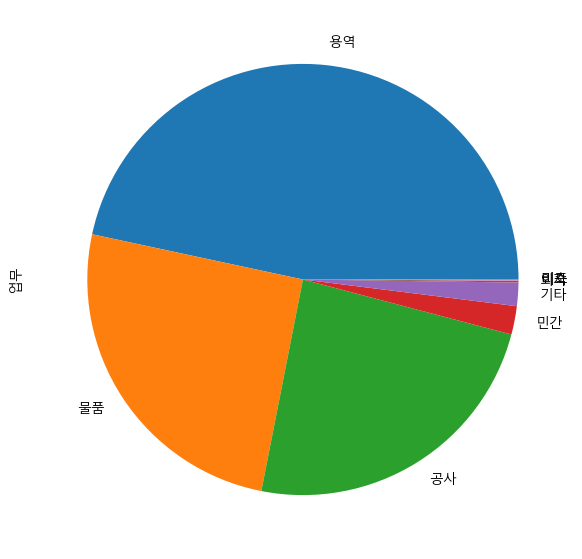

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
work_normalize.plot.pie(figsize=(7,7))

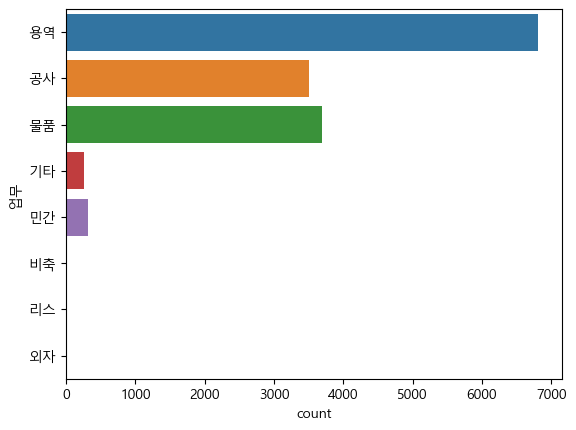

In [66]:
import warnings
warnings.filterwarnings(action='ignore')
a = sns.countplot(data=result, y='업무')

In [67]:
result.loc[result['재입찰'].str.contains('허용'), '재입찰'] = '재입찰 허용'
result.loc[result['재입찰'].str.contains('재입찰 없음|불가'), '재입찰'] = '재입찰 불가'

<AxesSubplot: >

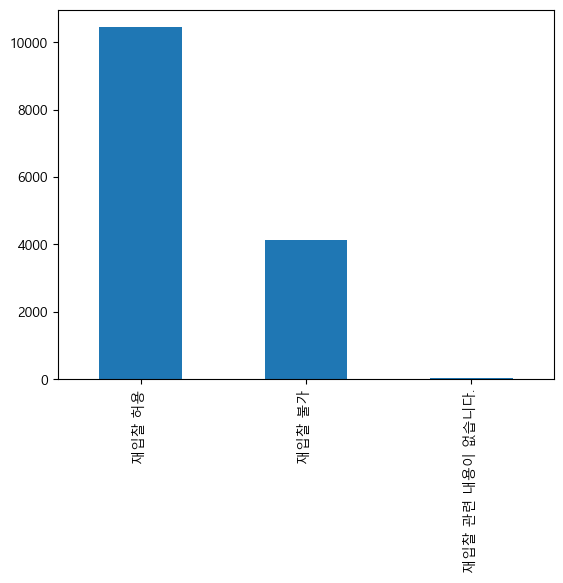

In [68]:
result['재입찰'].value_counts().plot.bar()